In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
import re
from tensorflow.keras.preprocessing.text import one_hot
import matplotlib.pyplot as py
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

In [10]:
df=pd.read_csv("Mental Health Dataset.csv")
df.posts=df.posts.astype(str)

In [11]:
df.isnull().sum()
print(df.tail())

                                                   posts      predicted  \
10387  hey everyone I am a 25 year old male I work ou...       negative   
10388  have surgery for stage 1 colon cancer 1 year a...  very negative   
10389  the doctor advise we he could not remove the a...        neutral   
10390  my 66 year old father have been through so muc...        neutral   
10391  I have bein have a bloody stool since last yea...       negative   

       intensity  
10387         -1  
10388         -2  
10389          0  
10390          0  
10391         -1  


In [12]:
def clean_text(text):
    text=text.lower()
    text=re.sub(r'[^a-zA-Z0-9\s]','',text)
    return text

In [13]:
df['posts']=df['posts'].apply(clean_text)

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming df.posts is your text data
vocab_size=500
max_length = 200
embed_vector_size=200
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(df.posts)

# Convert text to sequences
encoded_reviews = tokenizer.texts_to_sequences(df.posts)

# Pad sequences
padded_reviews = pad_sequences(encoded_reviews, maxlen=max_length, padding='post')


In [15]:
# neural network model
from tensorflow.keras.utils import to_categorical

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_reviews, df['intensity'], test_size=0.2, random_state=42)

# Build the model with Dropout layers
model = Sequential()
model.add(Embedding(vocab_size, embed_vector_size, input_length=max_length, name="embedding"))
model.add(Flatten())
model.add(Dropout(0.5))  # Adding dropout with a dropout rate of 0.5
model.add(Dense(4, activation='softmax'))  # Assuming you have 4 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the oversampled data
model.fit(X_train, to_categorical(y_train,num_classes=4), epochs=5, validation_data=(X_test, to_categorical(y_test, num_classes=4)))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, to_categorical(y_test, num_classes=4))
print(f"Accuracy on Test Set: {accuracy}")


Epoch 1/5
260/260 [==============================] - 18s 58ms/step - loss: 0.9081 - accuracy: 0.6295 - val_loss: 0.7819 - val_accuracy: 0.6700
Epoch 2/5
260/260 [==============================] - 6s 23ms/step - loss: 0.6004 - accuracy: 0.7696 - val_loss: 0.7518 - val_accuracy: 0.6922
Epoch 3/5
260/260 [==============================] - 3s 12ms/step - loss: 0.3833 - accuracy: 0.8779 - val_loss: 0.7776 - val_accuracy: 0.6888
Epoch 4/5
260/260 [==============================] - 2s 7ms/step - loss: 0.2404 - accuracy: 0.9385 - val_loss: 0.8339 - val_accuracy: 0.6801
Epoch 5/5
65/65 [==============================] - 0s 4ms/step - loss: 0.8743 - accuracy: 0.6859
Accuracy on Test Set: 0.685906708240509


65/65 [==============================] - 0s 2ms/step
Accuracy on Test Set: 0.6859066859066859


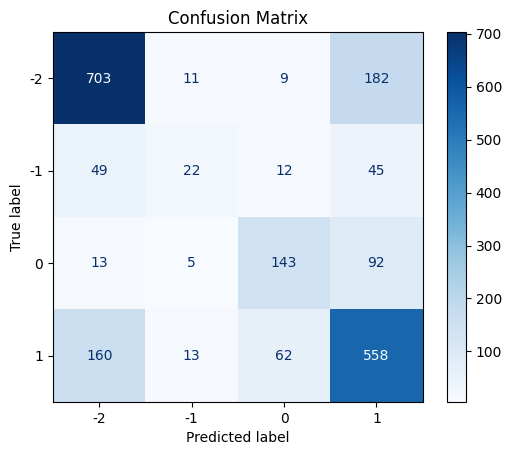

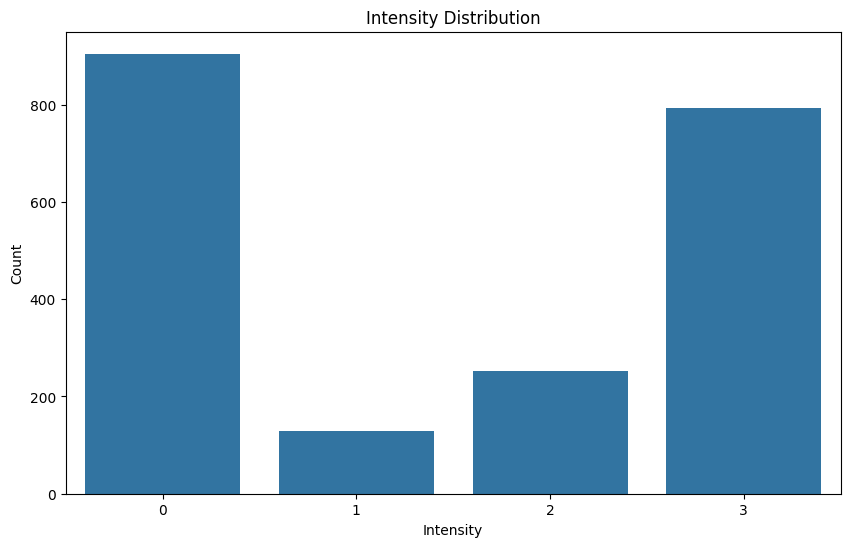

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical


# Evaluation
predictions = model.predict(X_test)
predicted_labels = tf.argmax(predictions, axis=1)

# Convert true labels to one-hot encoding
y_test_one_hot = to_categorical(y_test, num_classes=4)

# Calculate accuracy
accuracy = accuracy_score(y_test_one_hot.argmax(axis=1), predicted_labels)
print(f"Accuracy on Test Set: {accuracy}")

# Confusion Matrix
cm = confusion_matrix(y_test_one_hot.argmax(axis=1), predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-2, -1, 0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

# Plotting Intensity Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=y_test_one_hot.argmax(axis=1))
plt.title('Intensity Distribution')
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.savefig('intensity.png')
plt.show()


In [ ]:
from tensorflow.keras.layers import LSTM

# Build the model with LSTM and Dropout layers
model = Sequential()
model.add(Embedding(vocab_size, embed_vector_size, input_length=max_length, name="embedding"))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.2))  # Adding dropout with a dropout rate of 0.2
model.add(Dense(4, activation='softmax'))  # Assuming you have 4 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Use categorical_crossentropy for classification

# Train the model on the oversampled data
model.fit(X_train, to_categorical(y_train, num_classes=4), epochs=15, validation_data=(X_test, to_categorical(y_test, num_classes=4)))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, to_categorical(y_test, num_classes=4))
print(f"Accuracy on Test Set: {accuracy}")


Epoch 1/15
260/260 [==============================] - 15s 39ms/step - loss: 1.1118 - accuracy: 0.5254 - val_loss: 1.0045 - val_accuracy: 0.6123
Epoch 2/15
260/260 [==============================] - 6s 22ms/step - loss: 1.0912 - accuracy: 0.4992 - val_loss: 1.0932 - val_accuracy: 0.4598
Epoch 3/15
260/260 [==============================] - 5s 18ms/step - loss: 1.0079 - accuracy: 0.5809 - val_loss: 0.8843 - val_accuracy: 0.6494
Epoch 4/15
260/260 [==============================] - 6s 22ms/step - loss: 0.8847 - accuracy: 0.6542 - val_loss: 0.8469 - val_accuracy: 0.6522
Epoch 5/15
260/260 [==============================] - 4s 17ms/step - loss: 0.8212 - accuracy: 0.6751 - val_loss: 0.7992 - val_accuracy: 0.6888
Epoch 6/15
260/260 [==============================] - 4s 17ms/step - loss: 0.7563 - accuracy: 0.7058 - val_loss: 0.7528 - val_accuracy: 0.6931
Epoch 7/15
260/260 [==============================] - 6s 21ms/step - loss: 0.7399 - accuracy: 0.7131 - val_loss: 0.7206 - val_accuracy: 0.700

In [ ]:
from tensorflow.keras.layers import Embedding, GRU
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=16, input_length=max_length))
model.add(GRU(units=64, return_sequences=True))
model.add(GRU(units=32))
model.add(Dropout(0.2))
model.add(Dense(units=4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the oversampled data
model.fit(X_train, to_categorical(y_train,num_classes=4), epochs=15, validation_data=(X_test, to_categorical(y_test, num_classes=4)))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, to_categorical(y_test, num_classes=4))
print(f"Accuracy on Test Set: {accuracy}")


Epoch 1/15
260/260 [==============================] - 15s 45ms/step - loss: 1.1295 - accuracy: 0.4896 - val_loss: 0.9466 - val_accuracy: 0.6219
Epoch 2/15
260/260 [==============================] - 5s 17ms/step - loss: 0.9124 - accuracy: 0.6427 - val_loss: 0.8370 - val_accuracy: 0.6652
Epoch 3/15
260/260 [==============================] - 6s 22ms/step - loss: 0.8356 - accuracy: 0.6738 - val_loss: 0.8008 - val_accuracy: 0.6734
Epoch 4/15
260/260 [==============================] - 6s 22ms/step - loss: 0.7830 - accuracy: 0.6951 - val_loss: 0.8152 - val_accuracy: 0.6537
Epoch 5/15
260/260 [==============================] - 5s 19ms/step - loss: 0.7538 - accuracy: 0.7119 - val_loss: 0.7658 - val_accuracy: 0.7003
Epoch 6/15
260/260 [==============================] - 5s 19ms/step - loss: 0.7325 - accuracy: 0.7263 - val_loss: 0.7631 - val_accuracy: 0.7018
Epoch 7/15
260/260 [==============================] - 5s 18ms/step - loss: 0.7165 - accuracy: 0.7329 - val_loss: 0.7431 - val_accuracy: 0.700

In [ ]:

from transformers import TFRobertaForSequenceClassification, RobertaTokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




# Assuming df['intensity'] is your target variable and df['posts'] contains text data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['posts'], df['intensity'], test_size=0.2, random_state=42)

# Load the pre-trained RoBERTa tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = TFRobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=4)  # Assuming you have 4 classes

# Tokenize and encode the training and testing data
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, return_tensors='tf')
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, return_tensors='tf')

# Convert labels to NumPy arrays
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()






# Convert to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train_np))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), y_test_np))

# Set batch size
batch_size = 4


# Create data loaders
train_loader = train_dataset.shuffle(len(train_dataset)).batch(batch_size)
test_loader = test_dataset.batch(batch_size)

# Set up the optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy()

# Training loop
epochs = 3

for epoch in range(epochs):
    for batch in train_loader:
        inputs, labels = batch
        with tf.GradientTape() as tape:
            logits = model(inputs, training=True)[0]
            loss = loss_fn(labels, logits)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        metric.update_state(labels, logits)

    print(f"Epoch {epoch + 1}, Loss: {loss.numpy()}, Accuracy: {metric.result().numpy()}")
    metric.reset_states()

# Evaluation
predictions = []
true_labels = []

for batch in test_loader:
    inputs, labels = batch
    logits = model(inputs, training=False)[0]
    predictions.extend(tf.argmax(logits, axis=1).numpy())
    true_labels.extend(labels.numpy())

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy on Test Set: {accuracy}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

Epoch 1, Loss: 3.0271964073181152, Accuracy: 0.7303019165992737
Epoch 2, Loss: 0.16802695393562317, Accuracy: 0.8241308927536011
Epoch 3, Loss: 0.13238589465618134, Accuracy: 0.8728497624397278
Accuracy on Test Set: 0.7912457912457912
